# Assignment 1

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

### <span style="color:chocolate">Exercise 1:</span> Create data (10 points)

Create artificial data using the function <span style="color:chocolate">create_1d_data()</span> defined at the top of this notebook. Set the following argument values:
- number of examples = 70;
- slope (w) = 2;
- intercept (b) = 1;
- bound = 1.

Denote the output by X and Y. Print the shape and the first 10 elements for each object.

In [3]:
# YOUR CODE HERE
num_examples = 70
w = 2  # slope
b = 1  # intercept
bound = 1  #  bound
X, Y = create_1d_data(num_examples, w, b, bound)

# Print the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Print the first 10 elements of X and Y
print("\nFirst 10 elements of X:", X[:10])
print("First 10 elements of Y:", Y[:10])

Shape of X: (70,)
Shape of Y: (70,)

First 10 elements of X: [0 1 2 3 4 5 6 7 8 9]
First 10 elements of Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data preprocessing

Given the simplicity of the data (just one feature in X), our sole task here is to divide the data into training and test sets.

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.3 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [4]:
# YOUR CODE HERE
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Print the shape of each array
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (49,)
Shape of X_test: (21,)
Shape of Y_train: (49,)
Shape of Y_test: (21,)


---
### Step 3: Exploratory data analysis (EDA)

EDA helps us to gain insights into the distribution and characteristics of the dataset we are dealing with.
This understanding is fundamental for making informed decisions regarding:
- data cleaning;
- feature selection;
- model building;
- model evaluation, etc.

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

1. Generate a scatter plot displaying the X_train data along the x-axis and the Y_train data along the y-axis, ensuring clear labeling of both axes. Add a title "Exploratory Data Analysis: Training Data" and a legend "observed training data" to the plot;
2. Enhance the plot by incorporating a vertical red line to denote the mean value of X_train. Accompany it with a legend clarifying the meaning of the line and the mean value of X_train.

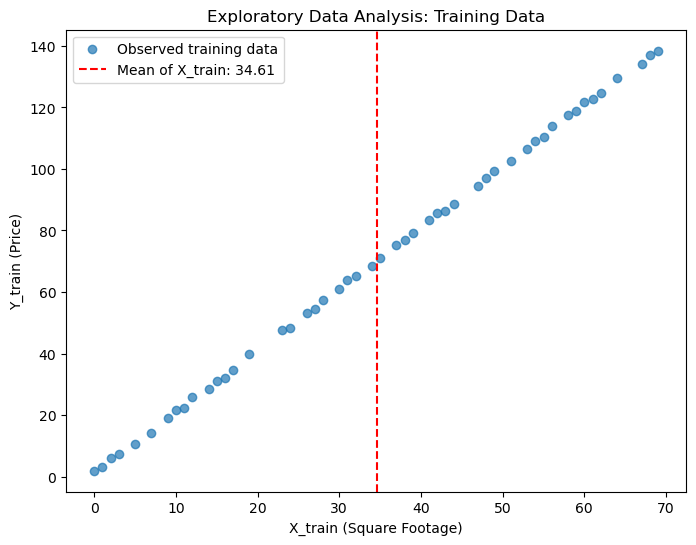

In [5]:
# YOUR CODE HERE
# Calculate the mean of X_train
mean_X_train = np.mean(X_train)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, alpha=0.7, label="Observed training data")

# Add a vertical line for the mean of X_train
plt.axvline(x=mean_X_train, color='red', linestyle='--', label=f'Mean of X_train: {mean_X_train:.2f}')

# Add labels and title
plt.xlabel("X_train (Square Footage)")
plt.ylabel("Y_train (Price)")
plt.title("Exploratory Data Analysis: Training Data")

# Add legend
plt.legend()

# Show the plot
plt.show()

---
### Step 4: Modeling

In this section, our objective is to propose models to describe the data generation process. Remember a model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = 5+x$
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Models for data (10 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_train. These predictions should be vectors of the same shape as Y_train. Call these predictions M1_hat_train and M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
2. Plot the prediction lines of these two models overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend.

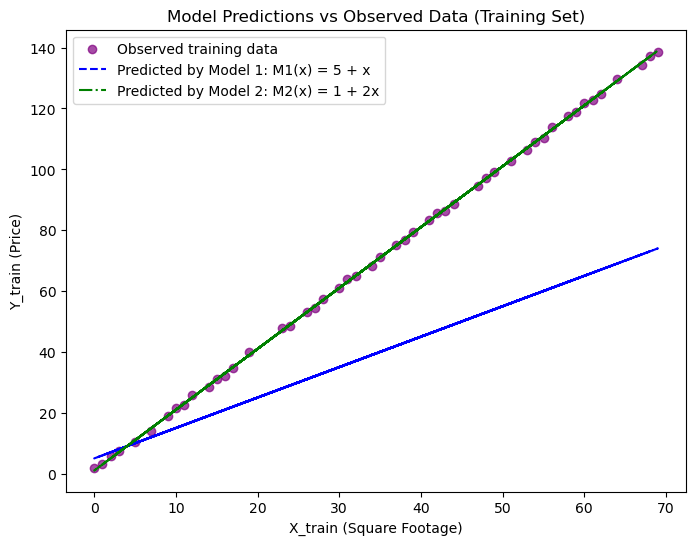

In [6]:
# YOUR CODE HERE
# Define the two models
def M1(x):
    return 5 + x

def M2(x):
    return 1 + 2 * x

# Compute the predictions for each model
M1_hat_train = M1(X_train)
M2_hat_train = M2(X_train)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the observed training data
plt.scatter(X_train, Y_train, alpha=0.7, label="Observed training data", color='purple')

# Plot the prediction lines for both models
plt.plot(X_train, M1_hat_train, color='blue', label="Predicted by Model 1: M1(x) = 5 + x", linestyle='--')
plt.plot(X_train, M2_hat_train, color='green', label="Predicted by Model 2: M2(x) = 1 + 2x", linestyle='-.')

# Add labels and title
plt.xlabel("X_train (Square Footage)")
plt.ylabel("Y_train (Price)")
plt.title("Model Predictions vs Observed Data (Training Set)")

# Add a legend
plt.legend()

# Show the plot
plt.show()


---
### Step 5: Evaluation and Generalization

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

How well do our models generalize? The test dataset serves as a proxy for unseen data in real-world applications. By evaluating the model on the test data, you can assess its ability to generalize beyond the training data. This ensures that the model can make accurate predictions on new data it hasn't seen during training.

### <span style="color:chocolate">Exercise 5:</span> Computing MSE (20 points)

1. Write a function for computing the MSE metric based on the provided definition;
2. Utilizing this function, calculate the training data MSE for the two models, $M_1$ and $M_2$.
3. Comment on which model fits the training data better.

In [7]:
# YOUR CODE HERE
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  return np.mean((true_values - predicted_values) ** 2)

In [8]:
# YOUR CODE HERE
# Compute the MSE for the training set
mse_M1_train = MSE(Y_train, M1_hat_train)
mse_M2_train = MSE(Y_train, M2_hat_train)

# Print the MSE results for the training set
print(f"Model 1 MSE on Training Set: {mse_M1_train:.4f}")
print(f"Model 2 MSE on Training Set: {mse_M2_train:.4f}")


Model 1 MSE on Training Set: 1358.2515
Model 2 MSE on Training Set: 0.3136


Comment: Since Model 2 MSE value is significantly lower than MSE value of Model 1, its the Model 2 which fits the training data better.

### <span style="color:chocolate">Exercise 6:</span> Generalization (15 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_test. These predictions should be vectors of the same shape as Y_test. Call these predictions M1_hat_test and M2_hat_test.
2. Calculate the test data MSE for the two models, $M_1$ and $M_2$, using the <span style="color:chocolate">MSE()</span> function defined above.
3. Does the model you chose in Exercise 5 generalize well?

In [9]:
# YOUR CODE HERE
# Compute predictions for the test set for both models
M1_hat_test = M1(X_test)  # Predictions for Model 1: y_hat = 5 + x
M2_hat_test = M2(X_test)  # Predictions for Model 2: y_hat = 1 + 2x

# Compute the MSE for the test set
mse_M1_test = MSE(Y_test, M1_hat_test)
mse_M2_test = MSE(Y_test, M2_hat_test)

# Print the MSE results for the test set
print(f"Model 1 MSE on Test Set: {mse_M1_test:.4f}")
print(f"Model 2 MSE on Test Set: {mse_M2_test:.4f}")


Model 1 MSE on Test Set: 1300.1040
Model 2 MSE on Test Set: 0.3370


Answer 3: the test MSE is relatively close to the training MSE, the model is generalizing well.

### <span style="color:chocolate">Exercise 7:</span> More features (25 points)

1. Fit an 8-th degree polynomial to (X_train, Y_train). Call the predictions of this model M3_hat_train. Hint: see <span style="color:chocolate">np.polyfit()</span> for details.
2. Plot the prediction lines of the $M_3$ overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend.
3. Calculate the training data MSE for the $M_3$ model using the <span style="color:chocolate">MSE()</span> function defined above.
4. Does model $M_3$ do better than your chosen model in Exercise 5 at predicting the labels for new unseen data? Hint: your new unseen data is the test dataset.

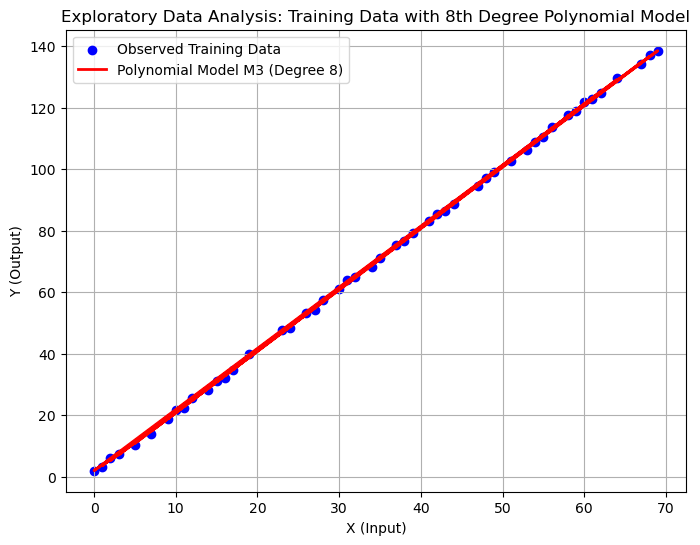

Model 3 (8th Degree Polynomial) MSE on Training Set: 0.2659


In [10]:
# YOUR CODE HERE

# Fit an 8th degree polynomial to the training data
coefficients = np.polyfit(X_train, Y_train, 8)  # Fit an 8th degree polynomial
polynomial = np.poly1d(coefficients)  # Create a polynomial function from the coefficients

# Generate predictions using the polynomial model for the training data
M3_hat_train = polynomial(X_train)

# Plot the training data and the polynomial prediction line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, label="Observed Training Data", color='blue')
plt.plot(X_train, M3_hat_train, label="Polynomial Model M3 (Degree 8)", color='red', linewidth=2)
plt.xlabel("X (Input)")
plt.ylabel("Y (Output)")
plt.title("Exploratory Data Analysis: Training Data with 8th Degree Polynomial Model")
plt.legend()
plt.grid(True)
plt.show()

# Compute the MSE for the training set for Model 3
mse_M3_train = MSE(Y_train, M3_hat_train)

# Print the MSE for Model 3
print(f"Model 3 (8th Degree Polynomial) MSE on Training Set: {mse_M3_train:.4f}")


In [11]:
# Generate predictions for the test set using the polynomial model
M3_hat_test = polynomial(X_test)

# Compute the MSE for the test set for Model 3
mse_M3_test = MSE(Y_test, M3_hat_test)

# Print the MSE results for the test set
print(f"Model 3 (8th Degree Polynomial) MSE on Test Set: {mse_M3_test:.4f}")


Model 3 (8th Degree Polynomial) MSE on Test Set: 0.3968


Interpretation:
Model 3 has a low training MSE suggests that the model fits the test data and generalizes well.
Since Model 2 MSE against test data is slightly lower i.e. 0.33 vs 0.39, it is slightly better and model 3 indicated overfitting.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Would you perform EDA on the test dataset?
1. Why or why not?
2. Provide a link to a paper/article to support your answer.

In [12]:
# YOUR ANSWER HERE